In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(xtrain,ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 22s 2us/step


In [5]:
len(xtrain)

60000

In [6]:
len(xtest)

10000

In [8]:
xtrain[0].shape

(28, 28)

In [10]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

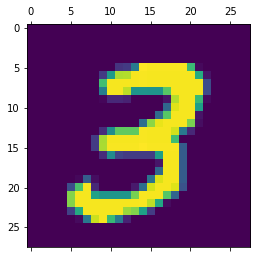

In [14]:
plt.matshow(xtrain[7])

In [17]:
ytrain[7]

3

In [19]:
ytrain[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [21]:
xtrain = xtrain/255
xtest = xtest/255

In [25]:
xtrain[12]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [27]:
xtrain_flattened = xtrain.reshape(len(xtrain), 28*28)
xtest_flattened = xtest.reshape(len(xtest), 28*28)

In [29]:
xtrain_flattened.shape

(60000, 784)

In [32]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(xtrain_flattened, ytrain, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1878 - accuracy: 0.5822
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9769 - accuracy: 0.7061
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7905 - accuracy: 0.7379
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6268 - accuracy: 0.7603
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4838 - accuracy: 0.7760


In [34]:
model.evaluate(xtest_flattened,ytest)

313/313 [==============================] - 0s 1ms/step - loss: 1.4040 - accuracy: 0.7999


[1.4040063619613647, 0.7998999953269958]

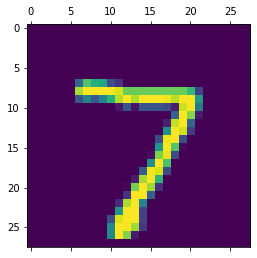

In [38]:
plt.matshow(xtest[0])

In [43]:
ypredict = model.predict(xtest_flattened)
ypredict[0]

array([0.32245958, 0.39838052, 0.3526698 , 0.4119762 , 0.47409108,
       0.37626097, 0.2856837 , 0.81007826, 0.37436396, 0.58544105],
      dtype=float32)

In [44]:
np.argmax(ypredict[0])

7

In [46]:
y_predicted_labels = [np.argmax(i) for i in ypredict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [48]:
cm = tf.math.confusion_matrix( labels=ytest, predictions=y_predicted_labels )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 931,    2,    7,    8,    0,    2,   23,    1,    6,    0],
       [   0, 1108,    7,    4,    0,    0,    3,    0,   13,    0],
       [  21,   84,  788,   32,   15,    0,   30,   22,   39,    1],
       [   8,   49,   26,  858,    1,    2,    5,   24,   27,   10],
       [   2,   49,    3,    0,  765,    0,   28,   10,    4,  121],
       [  44,  113,    4,  205,   29,  365,   27,   45,   30,   30],
       [  30,   49,    7,    0,   13,    9,  849,    0,    1,    0],
       [   2,   68,   12,    2,    9,    0,    2,  905,    7,   21],
       [  25,   91,    8,   97,   12,    2,   17,   26,  669,   27],
       [  23,   43,    5,   10,   64,    0,    1,   95,    7,  761]])>

Text(69.0, 0.5, 'Truth')

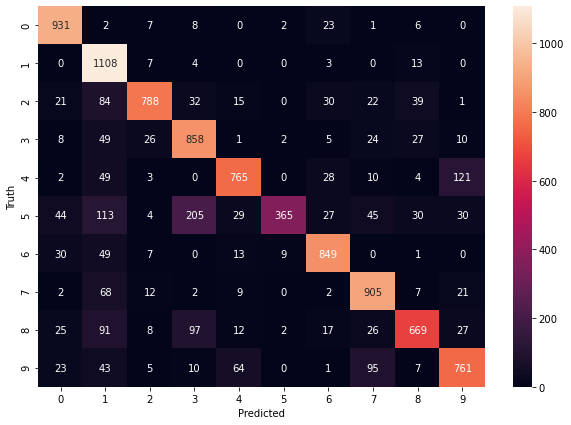

In [49]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100,activation ='relu'),  # input layer
    keras.layers.Dense(10,activation ='sigmoid')  # output layer
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1865 - accuracy: 0.7259
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4907 - accuracy: 0.8738
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3838 - accuracy: 0.8955
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3428 - accuracy: 0.9039
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3194 - accuracy: 0.9093


In [54]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.3017 - accuracy: 0.9133


[0.3016931414604187, 0.9132999777793884]

Text(69.0, 0.5, 'Truth')

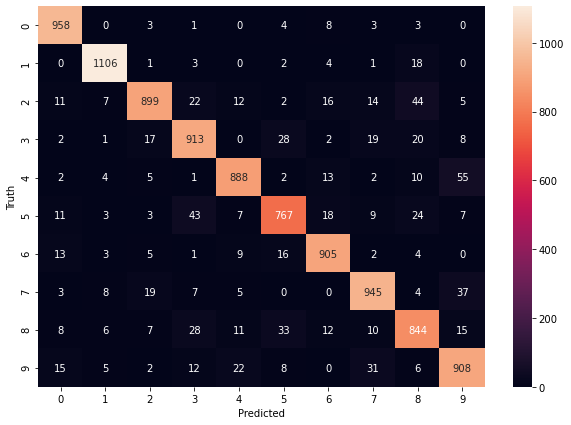

In [56]:
ypredict = model.predict(xtest)
y_predicted_labels = [np.argmax(i) for i in ypredict]
cm = tf.math.confusion_matrix( labels=ytest, predictions=y_predicted_labels )
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using different optimizer and activation functions

In [58]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100,activation ='relu'),  # input layer
    keras.layers.Dense(10,activation ='sigmoid')  # output layer
])
model.compile(optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1811 - accuracy: 0.7165
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4964 - accuracy: 0.8715
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3888 - accuracy: 0.8933
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3464 - accuracy: 0.9026
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3229 - accuracy: 0.9081


In [59]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.3030 - accuracy: 0.9142


[0.30299222469329834, 0.9142000079154968]